In [53]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [54]:
dataset = pd.read_csv('A.csv',index_col="Date",parse_dates=True)

In [55]:
dataset.head()
last_row = 25
dataset_test = dataset.tail(last_row)
dataset.drop(dataset.tail(last_row).index,inplace=True) # drop last n rows

In [56]:
dataset.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5099 entries, 2020-01-04 to 1999-12-27
Data columns (total 6 columns):
Open         5099 non-null float64
High         5099 non-null float64
Low          5099 non-null float64
Close        5099 non-null float64
Adj Close    5099 non-null float64
Volume       5099 non-null int64
dtypes: float64(5), int64(1)
memory usage: 278.9 KB


<AxesSubplot:xlabel='Date'>

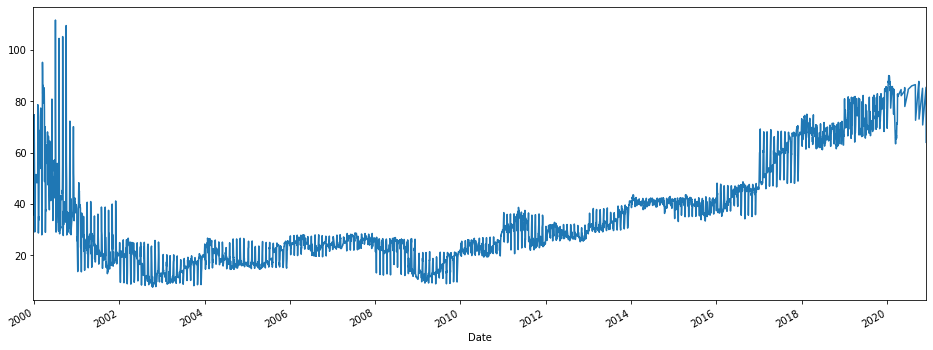

In [58]:
dataset['Open'].plot(figsize=(16,6))

In [59]:
# convert column "a" of a DataFrame
# dataset["Close"] = dataset["Close"].str.replace(',', '').astype(float)

In [60]:
# dataset["Volume"] = dataset["Volume"].str.replace(',', '').astype(float)

In [61]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-31,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-27,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-26,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-25,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-24,69.581429,71.977143,68.478571,70.548572,70.446806,2.296600e+06
2020-03-23,69.200000,71.595714,67.612857,69.755715,69.630968,2.413171e+06
2020-03-20,68.292858,71.338571,66.821428,69.018572,68.869725,2.618357e+06


<AxesSubplot:xlabel='Date'>

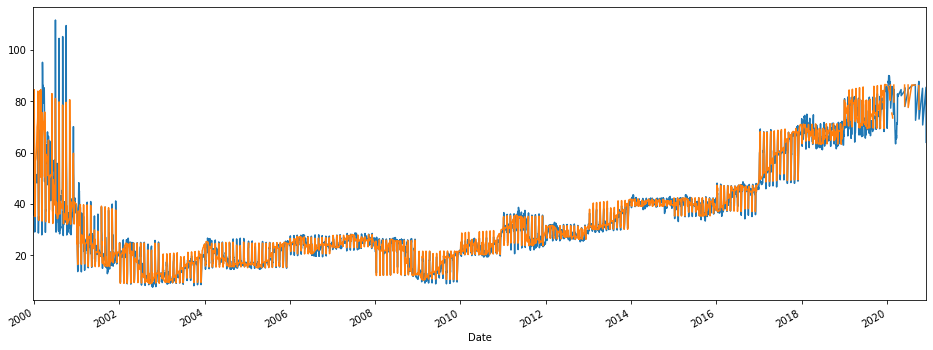

In [62]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

<AxesSubplot:xlabel='Date'>

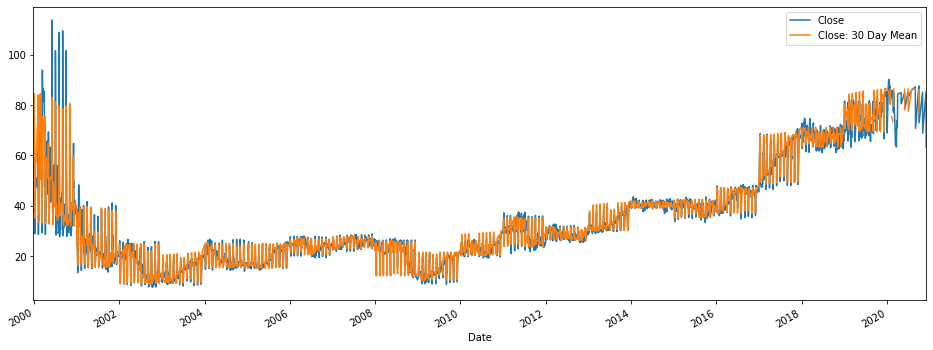

In [63]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

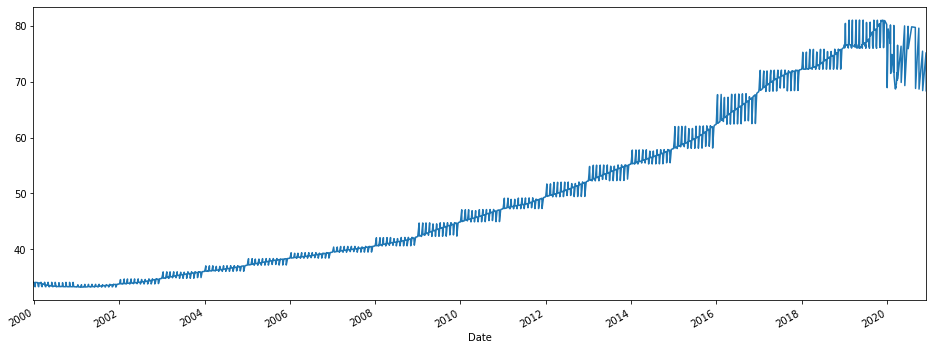

In [64]:
# Optional specify a minimum number of periods
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [65]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)


In [66]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [67]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [68]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



In [69]:
# Initialising the RNN
regressor = Sequential()



In [70]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



In [71]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
38/38 [==============================] - 6s 56ms/step - loss: 0.0647
Epoch 2/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0048
Epoch 3/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0031
Epoch 4/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0030
Epoch 5/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0033
Epoch 6/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0027
Epoch 7/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0027
Epoch 8/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0026
Epoch 9/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0026
Epoch 10/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0022
Epoch 11/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0021
Epoch 12/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0028
Epoch 13/100
38/38 [=====

38/38 [==============================] - 10s 256ms/step - loss: 6.5460e-04
Epoch 99/100
38/38 [==============================] - 10s 253ms/step - loss: 5.9748e-04
Epoch 100/100
38/38 [==============================] - 10s 252ms/step - loss: 5.8534e-04


In [72]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
# dataset_test = pd.read_csv('A_Test.csv',index_col="Date",parse_dates=True)

dataset_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-23,33.977112,35.765381,33.932404,35.586552,30.606049,2159400
1999-12-22,33.351215,34.021816,33.127682,34.021816,29.260303,1905700
1999-12-21,33.395924,33.395924,32.904148,33.351215,28.683558,2259400
1999-12-20,33.082977,33.574749,32.993561,33.530045,28.837358,1196800
1999-12-17,33.172390,33.708870,32.501789,32.859444,28.260609,3708000


In [73]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [74]:
dataset_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-23,33.977112,35.765381,33.932404,35.586552,30.606049,2159400
1999-12-22,33.351215,34.021816,33.127682,34.021816,29.260303,1905700
1999-12-21,33.395924,33.395924,32.904148,33.351215,28.683558,2259400
1999-12-20,33.082977,33.574749,32.993561,33.530045,28.837358,1196800
1999-12-17,33.172390,33.708870,32.501789,32.859444,28.260609,3708000


In [75]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25 entries, 1999-12-23 to 1999-11-18
Data columns (total 6 columns):
Open         25 non-null float64
High         25 non-null float64
Low          25 non-null float64
Close        25 non-null float64
Adj Close    25 non-null float64
Volume       25 non-null int64
dtypes: float64(5), int64(1)
memory usage: 1.4 KB


In [76]:
# dataset_test["Volume"] = dataset_test["Volume"].str.replace(',', '').astype(float)

In [77]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [78]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25 entries, 1999-12-23 to 1999-11-18
Data columns (total 1 columns):
Open    25 non-null float64
dtypes: float64(1)
memory usage: 400.0 bytes


In [79]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [80]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
0    20 non-null float32
dtypes: float32(1)
memory usage: 160.0 bytes


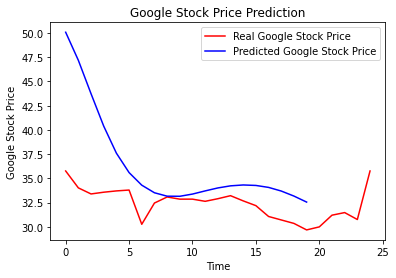

In [81]:

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
